# IMPORT DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -q "/content/drive/MyDrive/DEEP_LEARNING/PlantDataset.zip"

# SETTING UP MONK

In [3]:
!pip install -U monk-colab

     |████████████████████████████████| 515 kB 2.1 MB/s 
     |████████████████████████████████| 358.1 MB 4.5 kB/s 
     |████████████████████████████████| 1.3 MB 65.1 MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=8cc3418dceb0283b0cfc5d212d24ef93ddd66cf01749aa5726c977b82e51ad71
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [4]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git
import sys
sys.path.append("./monk_v1/monk")

Cloning into 'monk_v1'...
remote: Enumerating objects: 6379, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 6379 (delta 31), reused 0 (delta 0), pack-reused 6331
Receiving objects: 100% (6379/6379), 190.18 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (4339/4339), done.
Checking out files: 100% (1803/1803), done.


In [5]:
from pytorch_prototype import prototype

# CREATING EXPERIMENT

In [6]:
ptf = prototype(verbose=1);
ptf.Prototype("plant_disease", "exp1");

Pytorch Version: 1.10.0+cu111

Experiment Details
    Project: plant_disease
    Experiment: exp1
    Dir: /content/workspace/plant_disease/exp1/



In [7]:
ptf.Default(dataset_path=["/content/dataset/train", "/content/dataset/val"], model_name="resnet18", freeze_base_network=True, num_epochs=5);

Dataset Details
    Train path:     /content/dataset/train
    Val path:       /content/dataset/val
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

    Model Loaded on device
        Model name:                           resnet18
        Num layers in model:  41
        Num trainable layers: 1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   reduceonplateaulr
    Params: {'mode': 'min', 'factor': 0.1, 'patience': 1, 'verbose': True, 'threshold': 0.0001, 'threshold_mode': 'rel', 'cooldown': 0, 'min_lr': 0, 'epsilon': 1e-08}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



## Using model finder

Performing Analysis-1


*   Model Name
*   Boolean value to freeze base network or not
*   Boolean value to use pretrained model as the starting point or not

Running the experiment with 10% data and number of epochs as 5 to check the models


*   "keep_all" - Keep all the sub experiments created
*   "keep_non" - Delete all sub experiments created

In [8]:
# Analysis - 1

# Analysis Project Name
analysis_name = "Model_Finder";

# Models to analyse
# First element in the list- Model Name
# Second element in the list - Boolean value to freeze base network or not
# Third element in the list - Boolean value to use pretrained model as the starting point or not
models = [["resnet34", True, True], ["resnet50", False, True], 
          ["densenet121", False, True], ["densenet169", True, True], ["densenet201", True, True]];  

# Num epochs for each experiment to run	
epochs=5;

# Percentage of original dataset to take in for experimentation
percent_data=10;

# "keep_all" - Keep all the sub experiments created
# "keep_non" - Delete all sub experiments created
ptf.Analyse_Models(analysis_name, models, percent_data, num_epochs=epochs, state="keep_none"); 


Running Model analysis
Analysis Name      : Model_Finder

Running experiment : 1/5
Experiment name    : Model_resnet34_freeze_base_pretrained


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Estimated time     : 3 min
Experiment Complete


Running experiment : 2/5
Experiment name    : Model_resnet50_unfreeze_base_pretrained


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Estimated time     : 6 min
Epoch     4: reducing learning rate of group 0 to 1.0000e-03.
Experiment Complete


Running experiment : 3/5
Experiment name    : Model_densenet121_unfreeze_base_pretrained


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

Estimated time     : 9 min
Experiment Complete


Running experiment : 4/5
Experiment name    : Model_densenet169_freeze_base_pretrained


Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

Estimated time     : 5 min
Experiment Complete


Running experiment : 5/5
Experiment name    : Model_densenet201_freeze_base_pretrained


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

Estimated time     : 6 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_Model_Finder
Generated statistics post all epochs
| Experiment Name                            |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|--------------------------------------------+-------------+-----------+--------------+------------|
| Model_resnet34_freeze_base_pretrained      |    0.82805  |  0.869245 |    0.602568  |   0.421213 |
| Model_resnet50_unfreeze_base_pretrained    |    0.975827 |  0.966851 |    0.0995009 |   0.154544 |
| Model_densenet121_unfreeze_base_pretrained |    0.97423  |  0.963168 |    0.106005  |   0.168339 |
| Model_densenet169_freeze_base_pretrained   |    0.877993 |  0.883057 |    0.471962  |   0.352272 |
| Model_densenet201_freeze_base_pretrained   |    0.87959  |  0.895948 |    0.473913  |   0.361645 |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## UPDATING THE MODEL
Making resnet50 as the model as it gives highest validation accuracy

In [11]:
ptf.update_model_name("resnet50");
ptf.update_freeze_base_network(True);
ptf.update_use_pretrained(True);
ptf.Reload();

Update: Model name - resnet50

Update: Freeze Base Network - True

Update: Use pretrained - True

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



# HYPERPARAMETER TUNING

## selecting `batch_sizes ` (2nd analysis)


  #Analysis - 2

In [12]:
analysis_name = "Batch_Size_Finder";

batch_sizes = [4, 8, 16, 32,64];


epochs = 5;

percent_data = 10;

ptf.Analyse_Batch_Sizes(analysis_name, batch_sizes, percent_data, num_epochs=epochs, state="keep_none"); 


Running Batch Size analysis
Analysis Name      : Batch_Size_Finder

Running experiment : 1/5
Experiment name    : Batch_Size_4
Estimated time     : 3 min
Experiment Complete


Running experiment : 2/5
Experiment name    : Batch_Size_8
Estimated time     : 3 min
Experiment Complete


Running experiment : 3/5
Experiment name    : Batch_Size_16
Estimated time     : 3 min
Experiment Complete


Running experiment : 4/5
Experiment name    : Batch_Size_32
Estimated time     : 3 min
Experiment Complete


Running experiment : 5/5
Experiment name    : Batch_Size_64
Estimated time     : 3 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_Batch_Size_Finder
Generated statistics post all epochs
| Experiment Name   |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------+-------------+-----------+--------------+------------|
| Batch_Size_4      |    0.816648 |  0.872007 |     0.688553 |   0.428822 |
| Batch_Size_8      |    0.87252  |  0.796501 |     

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Updating Batch Size to 4

In [13]:
ptf.update_batch_size(4);
ptf.Reload();

Update: Batch size - 4

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



## Selecting `input_sizes ` (3rd analysis)

In [14]:
analysis_name = "Input_Size_Finder";
	
input_sizes = [224, 256, 512];

epochs=5;

percent_data=10;

ptf.Analyse_Input_Sizes(analysis_name, input_sizes, percent_data, num_epochs=epochs, state="keep_none"); 


Running Input Size analysis
Analysis Name      : Input_Size_Finder

Running experiment : 1/3
Experiment name    : Input_Size_224
Estimated time     : 3 min
Experiment Complete


Running experiment : 2/3
Experiment name    : Input_Size_256
Estimated time     : 3 min
Experiment Complete


Running experiment : 3/3
Experiment name    : Input_Size_512
Estimated time     : 3 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_Input_Size_Finder
Generated statistics post all epochs
| Experiment Name   |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------+-------------+-----------+--------------+------------|
| Input_Size_224    |    0.811403 |  0.879374 |     0.669591 |   0.409673 |
| Input_Size_256    |    0.811403 |  0.839779 |     0.654699 |   0.506819 |
| Input_Size_512    |    0.815507 |  0.86372  |     0.662962 |   0.411047 |



<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Updating input_size to 244

In [15]:
ptf.update_input_size(224);
ptf.Reload();

Update: Input size - 224

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



## Selecting **Learning Rate** (4th analysis)

In [20]:
analysis_name = "Learning_Rate_Finder"

lrs = [0.01, 0.005, 0.001, 0.0001];
epochs=5
percent_data=10
ptf.Analyse_Learning_Rates(analysis_name, lrs, percent_data, num_epochs=epochs, state="keep_none"); 


Running Learning rate analysis
Analysis Name      : Learning_Rate_Finder

Running experiment : 1/4
Experiment name    : Learning_Rate_0.01
Estimated time     : 3 min
Epoch     5: reducing learning rate of group 0 to 1.0000e-03.
Experiment Complete


Running experiment : 2/4
Experiment name    : Learning_Rate_0.005
Estimated time     : 3 min
Experiment Complete


Running experiment : 3/4
Experiment name    : Learning_Rate_0.001
Estimated time     : 3 min
Experiment Complete


Running experiment : 4/4
Experiment name    : Learning_Rate_0.0001
Estimated time     : 3 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_Learning_Rate_Finder
Generated statistics post all epochs
| Experiment Name      |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|----------------------+-------------+-----------+--------------+------------|
| Learning_Rate_0.01   |    0.800684 |  0.861878 |     0.761576 |   0.555897 |
| Learning_Rate_0.005  |    0.823717 |  0.890424 |     

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Updating learning_rate to 0.005

In [17]:
ptf.update_learning_rate(0.005);
ptf.Reload();

Update: Learning Rate - 0.005

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



## Selecting **Optimiser** (5th analysis)

In [18]:
analysis_name = "Optimiser_Finder";

optimizers = ["sgd", "adam", "adamax", "rmsprop"]; 
epochs = 5;
percent_data = 10;
ptf.Analyse_Optimizers(analysis_name, optimizers, percent_data, num_epochs=epochs, state="keep_none"); 


Running Optimizer analysis
Analysis Name      : Optimiser_Finder

Running experiment : 1/4
Experiment name    : Optimizer_sgd
Estimated time     : 3 min
Experiment Complete


Running experiment : 2/4
Experiment name    : Optimizer_adam
Estimated time     : 3 min
Epoch     4: reducing learning rate of group 0 to 5.0000e-04.
Experiment Complete


Running experiment : 3/4
Experiment name    : Optimizer_adamax
Estimated time     : 3 min
Epoch     4: reducing learning rate of group 0 to 5.0000e-04.
Experiment Complete


Running experiment : 4/4
Experiment name    : Optimizer_rmsprop
Estimated time     : 3 min
Experiment Complete


Comparing Experiments
Comparison ID:      Comparison_Optimiser_Finder
Generated statistics post all epochs
| Experiment Name   |   Train Acc |   Val Acc |   Train Loss |   Val Loss |
|-------------------+-------------+-----------+--------------+------------|
| Optimizer_sgd     |    0.789282 |  0.876611 |     0.822942 |   0.4912   |
| Optimizer_adam    |    0.859

<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Updating learning_rate to 0.005

In [19]:
## Update Optimiser
ptf.optimizer_adamax(0.005);
ptf.Reload();

Optimizer
    Name:          adamax
    Learning rate: 0.005
    Params:        {'lr': 0.005, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1



## Set intermediate state saving to false

-   This step reduces the size of our workspaces

In [21]:
ptf.update_save_intermediate_models(False);

Update: Save Intermediate models - False



# TRAINING

In [22]:
ptf.Train();

Training Start
    Epoch 1/5
    ----------


100%|██████████| 11004/11004 [03:22<00:00, 54.23it/s]

100%|█████████▉| 2747/2751 [00:46<00:00, 58.66it/s]



    curr_lr - 0.005
    [Epoch 1] Train-acc: 0.770, Train-loss: 0.815 | Val-acc: 0.915667, Val-loss: 0.274, | time: 250.5 sec

    Epoch 2/5
    ----------


100%|██████████| 11004/11004 [03:21<00:00, 54.60it/s]

100%|██████████| 2751/2751 [00:46<00:00, 58.39it/s]



    curr_lr - 0.005
    [Epoch 2] Train-acc: 0.841, Train-loss: 0.532 | Val-acc: 0.932206, Val-loss: 0.229, | time: 249.3 sec

    Epoch 3/5
    ----------


100%|██████████| 11004/11004 [03:18<00:00, 55.33it/s]

100%|█████████▉| 2750/2751 [00:46<00:00, 60.99it/s]



    curr_lr - 0.005
    [Epoch 3] Train-acc: 0.859, Train-loss: 0.485 | Val-acc: 0.943021, Val-loss: 0.190, | time: 245.9 sec

    Epoch 4/5
    ----------


100%|██████████| 11004/11004 [03:18<00:00, 55.39it/s]

100%|█████████▉| 2745/2751 [00:46<00:00, 59.79it/s]



    curr_lr - 0.005
    [Epoch 4] Train-acc: 0.865, Train-loss: 0.464 | Val-acc: 0.934933, Val-loss: 0.219, | time: 245.8 sec

    Epoch 5/5
    ----------


100%|██████████| 11004/11004 [03:18<00:00, 55.33it/s]

100%|█████████▉| 2745/2751 [00:46<00:00, 60.47it/s]

Epoch     5: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.005
    [Epoch 5] Train-acc: 0.875, Train-loss: 0.432 | Val-acc: 0.937114, Val-loss: 0.220, | time: 245.7 sec

    Training completed in: 20m 34s
    Best val Acc:          0.943021

Training End

Training Outputs
    Model Dir:   /content/workspace/plant_disease/exp1/output/models/
    Log Dir:     /content/workspace/plant_disease/exp1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



100%|██████████| 2751/2751 [00:47<00:00, 58.27it/s]


<Figure size 432x288 with 0 Axes>

In [30]:
ptf = prototype(verbose=1);
ptf.Prototype("plant_disease", "exp2", copy_from=["plant_disease", "exp1"]);

Pytorch Version: 1.10.0+cu111

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39

Model Details
    Loading model - workspace/plant_disease/exp1/output/models/final
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1

Experiment Details
    Project: plant_disease
    Experiment: exp2
    Dir: /content/workspace/plant_disease/exp2/



In [31]:
ptf.Summary()



Experiment Summary

System
    Project Name:    plant_disease
    Project Dir:     workspace/plant_disease/
    Experiment Name: exp2
    Experiment Dir:  workspace/plant_disease/exp2/
    Library:         Pytorch
    Origin:          ['plant_disease', 'exp1']

Dataset
    Status:       True
    Dataset Type: train-val
    Train path:   /content/dataset/train
    Val path:     /content/dataset/val
    Test path:    False
    CSV Train:    None
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   224
    Batch Size:   4
    Shuffle:      True
    Processors:   4
    Num Classes:  39

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [

In [32]:
ptf.update_num_epochs(10)
ptf.Reload()

Update: Num Epochs - 10

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 44014
    Num val images:   11004
    Num classes:      39



In [33]:
ptf.Train()

Training Start
    Epoch 1/10
    ----------


100%|██████████| 11004/11004 [03:20<00:00, 54.82it/s]

100%|██████████| 2751/2751 [00:46<00:00, 60.19it/s]



    curr_lr - 0.005
    [Epoch 1] Train-acc: 0.875, Train-loss: 0.439 | Val-acc: 0.943112, Val-loss: 0.205, | time: 247.7 sec

    Epoch 2/10
    ----------


100%|██████████| 11004/11004 [03:20<00:00, 54.94it/s]

100%|██████████| 2751/2751 [00:46<00:00, 61.49it/s]



    curr_lr - 0.005
    [Epoch 2] Train-acc: 0.882, Train-loss: 0.415 | Val-acc: 0.946201, Val-loss: 0.187, | time: 247.2 sec

    Epoch 3/10
    ----------


100%|██████████| 11004/11004 [03:18<00:00, 55.51it/s]

100%|█████████▉| 2750/2751 [00:46<00:00, 60.40it/s]



    curr_lr - 0.005
    [Epoch 3] Train-acc: 0.885, Train-loss: 0.399 | Val-acc: 0.947474, Val-loss: 0.188, | time: 245.4 sec

    Epoch 4/10
    ----------


100%|██████████| 11004/11004 [03:21<00:00, 54.73it/s]

100%|█████████▉| 2745/2751 [00:46<00:00, 58.41it/s]

Epoch     4: reducing learning rate of group 0 to 5.0000e-04.


    curr_lr - 0.0005
    [Epoch 4] Train-acc: 0.887, Train-loss: 0.394 | Val-acc: 0.951927, Val-loss: 0.194, | time: 248.3 sec

    Epoch 5/10
    ----------


100%|██████████| 11004/11004 [03:22<00:00, 54.25it/s]

100%|█████████▉| 2748/2751 [00:47<00:00, 59.57it/s]



    curr_lr - 0.0005
    [Epoch 5] Train-acc: 0.918, Train-loss: 0.268 | Val-acc: 0.957107, Val-loss: 0.154, | time: 251.3 sec

    Epoch 6/10
    ----------


100%|██████████| 11004/11004 [03:25<00:00, 53.46it/s]

100%|█████████▉| 2748/2751 [00:47<00:00, 59.23it/s]



    curr_lr - 0.0005
    [Epoch 6] Train-acc: 0.922, Train-loss: 0.256 | Val-acc: 0.959742, Val-loss: 0.141, | time: 254.5 sec

    Epoch 7/10
    ----------


100%|██████████| 11004/11004 [03:25<00:00, 53.58it/s]

100%|██████████| 2751/2751 [00:47<00:00, 59.89it/s]



    curr_lr - 0.0005
    [Epoch 7] Train-acc: 0.921, Train-loss: 0.251 | Val-acc: 0.958924, Val-loss: 0.146, | time: 253.0 sec

    Epoch 8/10
    ----------


100%|██████████| 11004/11004 [03:22<00:00, 54.33it/s]

100%|█████████▉| 2750/2751 [00:46<00:00, 61.30it/s]



    curr_lr - 0.0005
    [Epoch 8] Train-acc: 0.924, Train-loss: 0.247 | Val-acc: 0.961832, Val-loss: 0.129, | time: 250.3 sec

    Epoch 9/10
    ----------


100%|██████████| 11004/11004 [03:23<00:00, 53.95it/s]

100%|█████████▉| 2749/2751 [00:47<00:00, 59.50it/s]



    curr_lr - 0.0005
    [Epoch 9] Train-acc: 0.924, Train-loss: 0.248 | Val-acc: 0.958288, Val-loss: 0.143, | time: 251.7 sec

    Epoch 10/10
    ----------


100%|██████████| 11004/11004 [03:21<00:00, 54.50it/s]

100%|█████████▉| 2750/2751 [00:46<00:00, 60.43it/s]



    curr_lr - 0.0005
    [Epoch 10] Train-acc: 0.926, Train-loss: 0.241 | Val-acc: 0.965104, Val-loss: 0.126, | time: 249.7 sec

    Training completed in: 41m 35s
    Best val Acc:          0.965104

Training End

Training Outputs
    Model Dir:   /content/workspace/plant_disease/exp2/output/models/
    Log Dir:     /content/workspace/plant_disease/exp2/output/logs/

100%|██████████| 2751/2751 [00:48<00:00, 57.13it/s]


    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

In [34]:
from compare_prototype import compare
ctf = compare(verbose=1);
ctf.Comparison("plant_disease");
ctf.Add_Experiment("plant_disease", "exp1");
ctf.Add_Experiment("plant_disease", "exp2");
ctf.Generate_Statistics()


Comparison: - plant_disease
Project - plant_disease, Experiment - exp1 added
Project - plant_disease, Experiment - exp2 added
Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

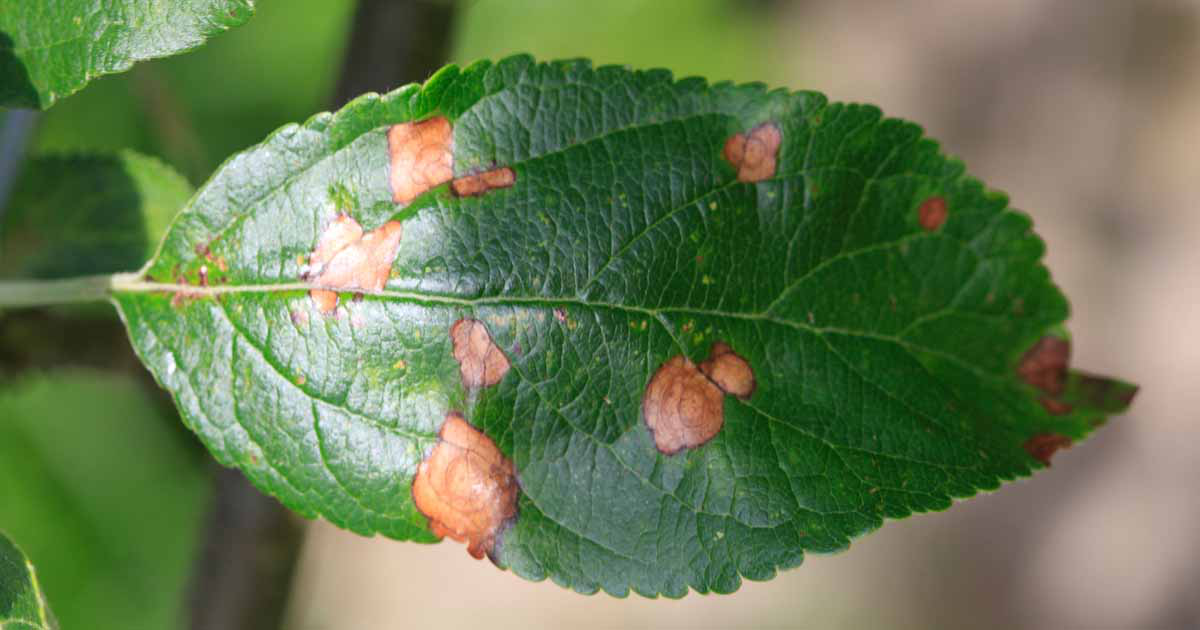

In [36]:
import numpy as np
import PIL.Image as Image
import requests

test_url = "https://gardenerspath.com/wp-content/uploads/2019/08/Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB.jpg"

r = requests.get(test_url) # create HTTP response object 
with open('test.jpg','wb') as f: 
    f.write(r.content) 

test = Image.open('./test.jpg')
test

In [37]:
ptf.Prototype("plant_disease", "exp2", eval_infer=True);

Model Details
    Loading model - workspace/plant_disease/exp2/output/models/final
    Model loaded!

Experiment Details
    Project: plant_disease
    Experiment: exp2
    Dir: /content/workspace/plant_disease/exp2/



In [38]:
img_name = "test.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True);
print(predictions)

Prediction
    Image name:         test.jpg
    Predicted class:      34
    Predicted score:      0.9919151663780212

{'img_name': 'test.jpg', 'predicted_class': '34', 'score': 0.99191517, 'raw': array([3.6297119e-09, 1.4481605e-12, 1.2372080e-13, 1.2305270e-09,
       2.1711189e-06, 1.5466646e-06, 1.5544115e-08, 6.0586419e-10,
       6.3066947e-04, 8.9732405e-10, 3.7152656e-08, 6.0601337e-06,
       9.8488189e-04, 7.8959483e-06, 1.7361457e-05, 1.9285135e-08,
       1.6280193e-18, 3.1912951e-08, 1.0784581e-05, 4.1556611e-10,
       3.2897245e-07, 4.3522096e-08, 9.6699866e-09, 2.0148100e-12,
       9.7302150e-04, 6.7229972e-05, 2.3364793e-13, 4.9198931e-03,
       9.9191517e-01, 8.7616030e-09, 6.5202516e-06, 1.2156608e-11,
       2.8564369e-09, 1.0908115e-07, 8.1954943e-07, 3.7729788e-09,
       3.9001958e-15, 4.0943426e-09, 4.5212434e-04], dtype=float32)}


In [39]:
import csv

def read_labels():
    mydict = {}
    with open('./dataset/labels.csv', mode='r') as infile:
        reader = csv.reader(infile)
        with open('labels_new.csv', mode='w') as outfile:
            writer = csv.writer(outfile)
            mydict = {rows[0]:rows[1] for rows in reader}
    return mydict

def predict_label(predictions):
    pred_class = predictions['predicted_class']
    label_dict = read_labels()
    out_label = label_dict[pred_class]
    return out_label

print("Predicted class for test image is : {}".format(predict_label(predictions)))

Predicted class for test image is : Apple___Black_rot
